### Capstone Sprint 1: Residential Energy Use Prediction ###
### Project Developed By Faisal Hameed ###
### Submitted On: February 23, 2024 ###

**Introduction** 

This year, at the height of winter and due to extreme cold, the Alberta grid was overstretched, prompting the [Alberta Electric System Operator (AESO)](https://globalnews.ca/news/10231766/alberta-grid-concerns-critical-infrastructure/)  to issue calls for people to limit energy use. This urgent appeal came as several power facilities were on the brink of collapse, posing a significant risk of rolling blackouts. Additionally, B.C. Hydro experienced surging electricity demand, setting new records.
Despite the critical infrastructure being managed by the three tiers of government and select public and private sector groups, every individual plays a crucial role as a stakeholder in this industry and should be empowered to contribute to its resilience and sustainability. This responsibility begins within every household, where a comprehensive understanding of energy consumption habits can collectively exert a significant influence on bolstering the grid's overall resilience and stability. This was the motivation behind leveraging machine learning to understand energy consumption patterns.

**Objective**

In many parts of the world, home energy consumption constitutes a significant expense that residents constantly strive to minimize. Often, we purchase and utilize appliances without fully understanding how external factors influence our usage patterns. Therefore, the aim of this project is to utilize energy data obtained from household appliances to predict expected energy consumption. This endeavor offers several benefits. Firstly, homeowners can accurately size photovoltaics and battery energy storage systems based on the predictions to accommodate additional load. Secondly, detecting and addressing unhealthy usage patterns can lead to a reduction in energy expenditure.

In this first sprint, our aim will be to familiarize ourselves with the data by doing the following:
- Data cleaning
- Exploratory data analysis
- Relationship between each feature and target
- Relationship between features

The diagrams to be drawn are listed as follows:

1. Energy consumption histogram
2. Scatter plots
3. Line graphs

### Dataset

We will be using a real world energy dataset of a [house](https://www.sciencedirect.com/science/article/pii/S0378778816308970?via%3Dihub) containing energy consumed, logged in ten minutes interval for a toal of 137 days.
The dataset contains information about energy consumption of appliances used in the home such as heat recovery ventilation unit, domestic hot water pump, the energy consumption of appliances, lighting, and electric baseboard heaters. The dataset also contains the weather condition at the time of recording, estimated by using the weather measurments from the nearest airport weather station (Chièvres Airport, Belgium), located within 12 km of the house. 

#### Data Dictionary

To help us with our analysis, we take some time to study the data dictionary below. 

Energy data of appliances:
- Appliances energy consumption (numeric) (Wh)
- Light energy consumption (numeric) (Wh)

Weather data
- T1, Temperature in kitchen area (numeric) (&deg;C)
- RH1, Humidity in kitchen area (numeric) (%)
- T2, Temperature in living room area (numeric) (&deg;C)
- RH2, Humidity in living room area (numeric) (%)
- T3, Temperature in laundry room area (numeric) (&deg;C)
- RH3, Humidity in laundry room area (numeric) (%)
- T4, Temperature in office room (numeric) (&deg;C)
- RH4, Humidity in office room (numeric) (%)
- T5, Temperature in bathroom (numeric) (&deg;C)
- RH5, Humidity in bathroom (numeric) (%)
- T6, Temperature outside the building (north side) (numeric) (&deg;C)
- RH6, Humidity outside the building (north side) (numeric) (%)
- T7, Temperature in ironing room (numeric) (&deg;C)
- RH7, Humidity in ironing room (numeric) (%)
- T8, Temperature in teenager room 2 (numeric) (&deg;C)
- RH8, Humidity in teenager room 2 (numeric) (%)
- T9, Temperature in parents room (numeric) (&deg;C)
- RH9, Humidity in parents room (numeric) (%)
- To, Temperature outside (from Chièvres weather station) (&deg;C)
- Pressure (from Chièvres weather station) (numeric) (mmHg)
- RHo, Humidity outside (from Chièvres weather station) (numeric)(%)
- Windspeed (from Chièvres weather station) (numeric) (m/s)
- Visibility (from Chièvres weather station)
- Tdewpoint (from Chièvres weather station) (numeric) (&deg;C)

Other data
- Random Variable 1 (RV_1) (numeric) (dimensionless)
- Random Variable 2 (RV_2) (numeric) (dimesnsionless)
- Number of seconds from midnight (NSM) (numeric) (s)
- Week status (weekend (0) or a weekday (1)) (categorical)

Date data
- Day of week (Monday, Tuesday… Sunday) (categorical)
- Date time stamp

Field of interest:
- Appliances energy consumption (numeric) (Wh)


## Plan of Sprint 1 (aka the Data Science Framework)

1. Acquire data ✅
2. Wrangle, process & clean the data
3. EDA - Exploratory Data Analysis
    - summary statistics
    - plots
    - looking at univariate and bivariate distributions (single columns and interaction between columns)
4. Insights and conclusions
    - communicate that efficiently to stakeholders

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
import seaborn as sns

In [22]:
# load in data
df_energy = pd.read_csv('data/energydata_complete.csv')
df_energy.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [23]:
# check for data shape and size
print(f'The dataset consists of {df_energy.shape[0]} rows and {df_energy.shape[1]} columns.')
print(f'The dataset consists of {df_energy.size} elements.')

The dataset consists of 19735 rows and 29 columns.
The dataset consists of 572315 elements.


In [24]:
# check column names
df_energy.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [25]:
# check for data types
df_energy.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

From observing the data types above, we can see that all the columns are numerical, being either int of float data type.
Therefore, we do not expect that their will be any need for binary encoding or dummy variable creation.

## 2. Data Cleaning

Now we will do some initial Exploratory Data Analysis
- Check for Null values
- Check for Duplicated Rows/Columns
- Distribution of Data

In [26]:
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

From the above, we can see that all the values in each column are non-null, showing that the dataset is clean.
Although the dataset is clean, we still be double-checking further.

In [27]:
df_energy.isna().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

As part of the EDA process, we will unpack the date column to 4 new columns:
- NSM (Number of Seconds from Midnight): Time of the day in seconds
- week_number: week of the year
- week_status: Weekend or Weekday
- day_of_week: Day of the week

In [34]:
df_energy['date'] = pd.to_datetime(df_energy['date'], format='%Y-%m-%d %H:%M:%S', utc=True)
df_energy.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00+00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00+00:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00+00:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00+00:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00+00:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [36]:
df_energy['NSM'] = df_energy.date.apply(lambda x: x.hour*3600 + x.minute*60 +x.second)

In [37]:
df_energy['day_of_week'] = df_energy.date.apply(lambda x: x.dayofweek)

In [38]:
df_energy['week_status'] = df_energy.day_of_week.apply(lambda x: 0 if (x == 5 or x == 6) else 1)

In [39]:
df_energy.duplicated().any()

False

In [40]:
df_energy.duplicated().T.any()

False

### 3. Exploratory Data Analysis

In [41]:
# check for statistic information for all continuous demographic features
df_energy.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,day_of_week,week_status
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033,42907.129465,2.977249,0.722726
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634,24940.020831,1.985617,0.447664
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322,0.000000,0.000000,0.000000
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889,21600.000000,1.000000,0.000000
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653,43200.000000,3.000000,1.000000
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769,64200.000000,5.000000,1.000000
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530,85800.000000,6.000000,1.000000


In [42]:
df_energy.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
Appliances,19735.0,97.695,102.525,10.000,50.000,60.000,100.000,1080.000
lights,19735.0,3.802,7.936,0.000,0.000,0.000,0.000,70.000
T1,19735.0,21.687,1.606,16.790,20.760,21.600,22.600,26.260
RH_1,19735.0,40.260,3.979,27.023,37.333,39.657,43.067,63.360
T2,19735.0,20.341,2.193,16.100,18.790,20.000,21.500,29.857
RH_2,19735.0,40.420,4.070,20.463,37.900,40.500,43.260,56.027
T3,19735.0,22.268,2.006,17.200,20.790,22.100,23.290,29.236
RH_3,19735.0,39.243,3.255,28.767,36.900,38.530,41.760,50.163
T4,19735.0,20.855,2.043,15.100,19.530,20.667,22.100,26.200
RH_4,19735.0,39.027,4.341,27.660,35.530,38.400,42.157,51.090


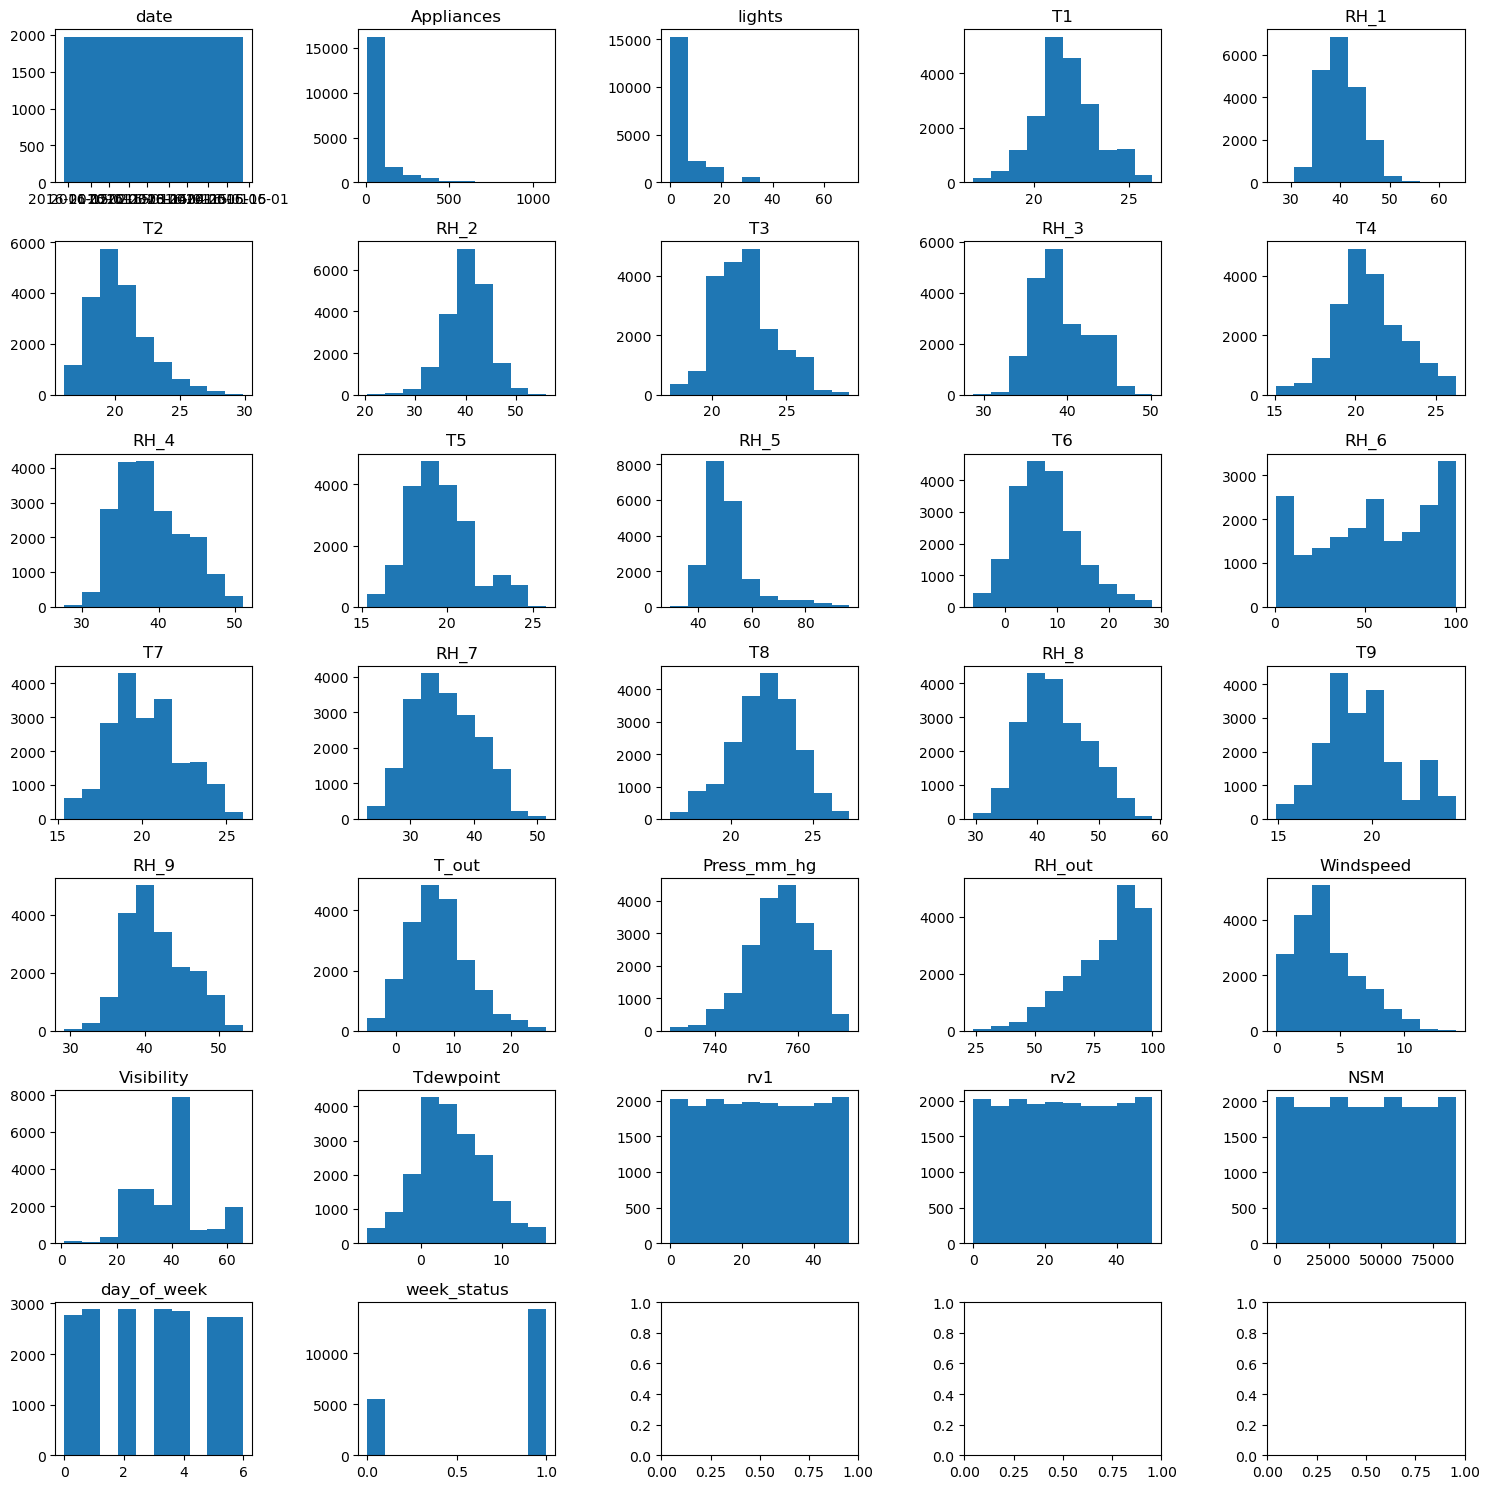

In [45]:
plt.subplots(7, 5, figsize=(15, 15))

count = 1

for col in df_energy.columns:
    plt.subplot(7, 5, count)
    plt.hist(df_energy[col])
    plt.title(col)
    
    count += 1
    
plt.tight_layout()
plt.show()

From the above, we observe a normal distribution in the temperature plots, including T1,
T2, T3, T4, T5, T6, T7, T8, T9, and T_out.

Also, we observe a normal distribution in relative humidity values as seen in RH1, RH2, RH3, 
RH4, RH5, RH7, RH8, RH9. RH6 and RH_out exhibit a different trend.
We will investigate this further in the coming sections.

Lastly, the air pressure, visibility and dew points are also normal in distribution.

In [46]:
df_energy['Appliances'].value_counts()

Appliances
50      4368
60      3282
40      2019
70      1560
80      1205
        ... 
890        1
1070       1
910        1
1080       1
840        1
Name: count, Length: 92, dtype: int64

#### 3.1. EDA 1: Energy Consumption by Appliances and Lights

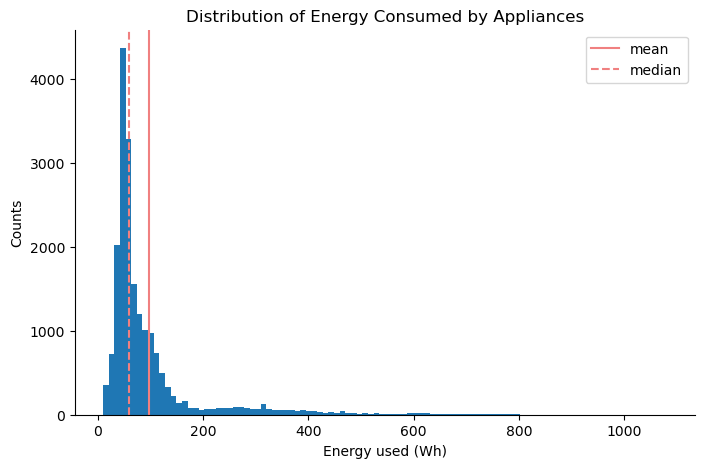

In [142]:
# Histogram plot of the energy consumed by appliances

plt.figure(figsize=(8, 5))

plt.hist(df_energy['Appliances'], bins=100)

plt.axvline(df_energy['Appliances'].mean(), color="lightcoral", label="mean")
plt.axvline(df_energy['Appliances'].median(), color="lightcoral", linestyle="--", label="median")

plt.title("Distribution of Energy Consumed by Appliances")
plt.ylabel('Counts')
plt.xlabel("Energy used (Wh)")
sns.despine()

plt.legend()
plt.show()

In [53]:
df_energy['lights'].value_counts()

lights
0     15252
10     2212
20     1624
30      559
40       77
50        9
70        1
60        1
Name: count, dtype: int64

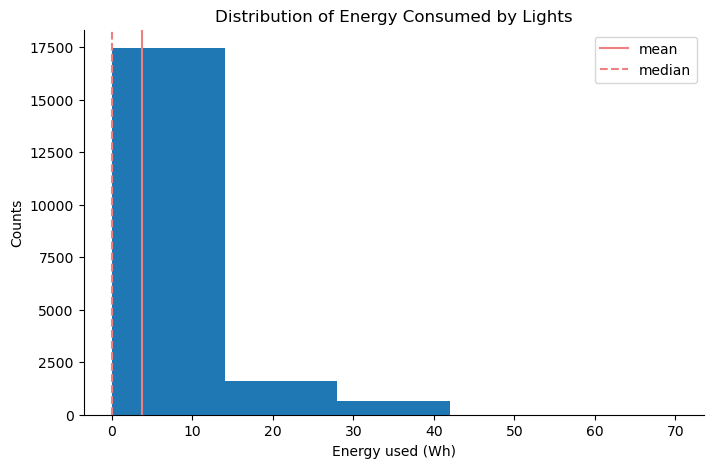

In [141]:
# Histogram plot of the energy consumed by lights

plt.figure(figsize=(8, 5))

plt.hist(df_energy['lights'], bins=5)

plt.axvline(df_energy['lights'].mean(), color="lightcoral", label="mean")
plt.axvline(df_energy['lights'].median(), color="lightcoral", linestyle="--", label="median")

plt.title("Distribution of Energy Consumed by Lights")
plt.ylabel('Counts')
plt.xlabel("Energy used (Wh)")
sns.despine()

plt.legend()
plt.show()

In the plot below, we will take the nergy consumed by lights and appliances values and aggregate them over each day to get their average, we then plot
to see if differs

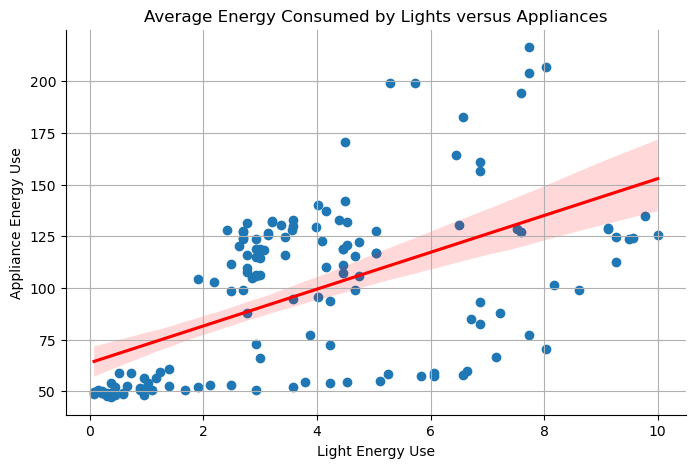

In [121]:
# Scatter plot of energy consumed by light versus appliances averaged every 10 minutes

plt.figure(figsize=(8, 5))

plt.scatter(df_energy.groupby("NSM")["lights"].agg(["mean"]), df_energy.groupby("NSM")["Appliances"].agg(["mean"]))
sns.regplot(data=df_energy.groupby("NSM").mean(), x="lights", y="Appliances", scatter=False, color='red')

plt.title("Average Energy Consumed by Lights versus Appliances")
plt.ylabel('Appliance Energy Use')
plt.xlabel("Light Energy Use")
sns.despine()

#plt.legend()
plt.grid()
plt.show()

The above is the energy consumed by appliances at a point in time averaged over the entire dataset versus the energy consumed by lights at a point in time averaged over the entire dataset for every ten-minute interval. The scatter plot generally shows a fairly proportional relationship between the two features. We can investigate this further below

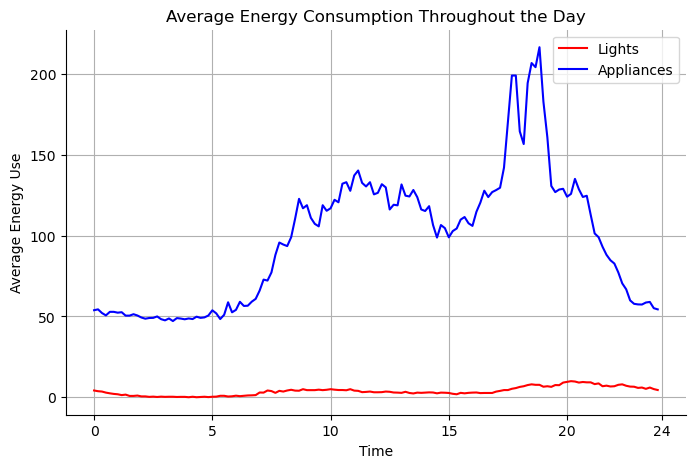

In [144]:
# Line plot of average energy consumed by appliances and lights every 10 minutes of the day

import seaborn as sns

plt.figure(figsize=(8, 5))

# scatter plot for average energy consumed by lights versus time (NSM)
plt.plot(df_energy.groupby("NSM")["lights"].mean().index/3600, df_energy.groupby("NSM")["lights"].mean(), color='red', label='Lights')
plt.plot(df_energy.groupby("NSM")["Appliances"].mean().index/3600, df_energy.groupby("NSM")["Appliances"].mean(), color='blue', label='Appliances')

plt.title("Average Energy Consumption Throughout the Day")
plt.xlabel('Time')
plt.ylabel("Average Energy Use")
plt.xticks([0,5,10,15,20,24])
sns.despine()
plt.legend()
plt.grid()
plt.show()


The above plot shows that the least amount of energy is consumed at midnight, rising and peaking at 11am,
declining from 11 am to 3 pm and then rises again, peaking at a much higher value at 7pm
from which it begins to decline till midnight. It is note worthy that the appliances
and lights have similar trends but on average, the appliances' consumption is higher than lights'.

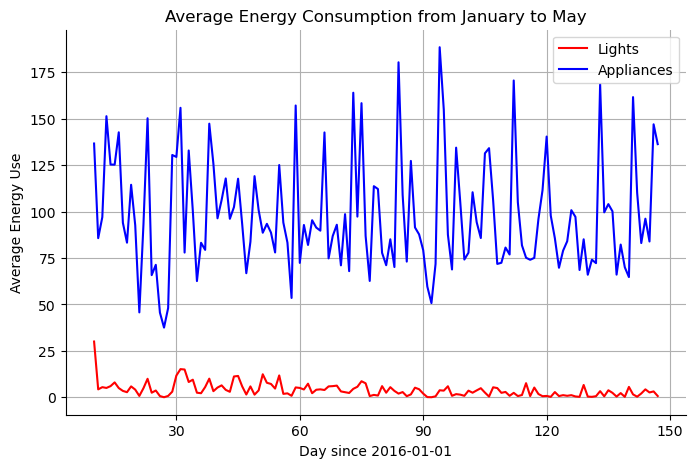

In [145]:
# Line plot of average energy consumed by appliances and lights every day

#extract from date the day number since the start of the year 2016 and get the average energy consumed daily
df_energy['date'] = df_energy['date'].dt.tz_localize(None)

# Calculate the day number since the start of the year 2016
df_energy['day_number'] = (df_energy['date'] - pd.Timestamp('2016-01-01')).dt.days

plt.figure(figsize=(8, 5))

# Scatter plot for average energy consumed by lights versus day since 2016 Jan 1
plt.plot(df_energy.groupby("day_number")["lights"].mean().index, df_energy.groupby("day_number")["lights"].mean(), color='red', label='Lights')
plt.plot(df_energy.groupby("day_number")["Appliances"].mean().index, df_energy.groupby("day_number")["Appliances"].mean(), color='blue', label='Appliances')

plt.title("Average Energy Consumption from January to May")
plt.xlabel('Day since 2016-01-01')
plt.ylabel("Average Energy Use")
plt.xticks([30, 60, 90, 120, 150])
sns.despine()
plt.legend()
plt.grid()
plt.show()

From the above daily average energy consumption, we observe increase in energy use
by applicances, peaking in the months of March and April, then declining 
afterwards. However, the energy consumption by light is seen to decrease and
the reason is because as we approach the summer months, the length of day increases
while night reduces.

#### 3.2. EDA: Temperature, Humidity and Pressure Analysis

We can investigate the distribution of one of the temperature measurements in the house. We suspect that the other temperatures distribution in the house will not be far off.

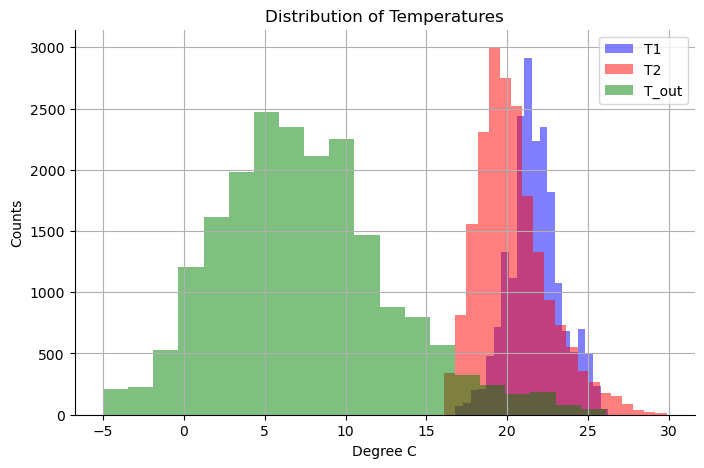

In [111]:
# Histogram plot of Temperatures

plt.figure(figsize=(8, 5))

plt.hist(df_energy['T1'], bins=20, label = 'T1', color='blue',  alpha=0.5)
plt.hist(df_energy['T2'], bins=20, label = 'T2', color='red',  alpha=0.5)
plt.hist(df_energy['T_out'], bins=20, label = 'T_out', color='green',  alpha=0.5)

#plt.axvline(df_energy['T1'].mean(), color="lightcoral", label="mean")
#plt.axvline(df_energy['T1'].median(), color="lightcoral", linestyle="--", label="median")

plt.title("Distribution of Temperatures")
plt.ylabel('Counts')
plt.xlabel("Degree C")
sns.despine()

plt.legend()
plt.grid()
plt.show()

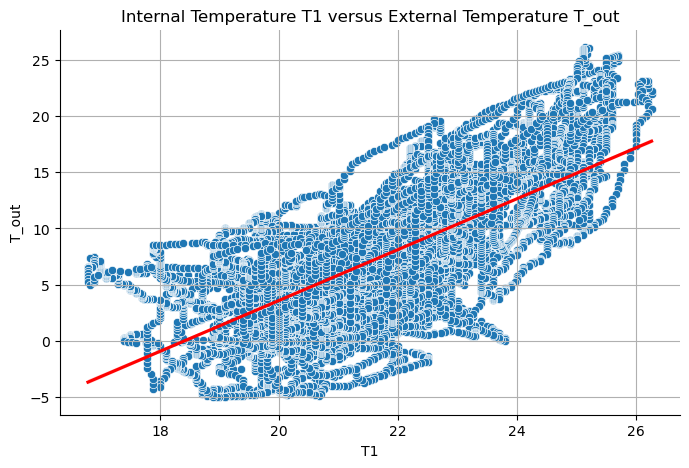

In [119]:
## Scatter plot of internal and external temperature

plt.figure(figsize=(8, 5))

#plt.scatter(df_energy["T1"], df_energy["T_out"])
sns.scatterplot(data=df_energy, x="T1", y="T_out")

sns.regplot(data=df_energy, x="T1", y="T_out", scatter=False, color='red')


plt.title("Internal Temperature T1 versus External Temperature T_out")
plt.ylabel('T_out')
plt.xlabel("T1")
sns.despine()

#plt.legend()
plt.grid()
plt.show()

From the above, we observe that there is a linear relationship between the external temperature and the temperature of the home

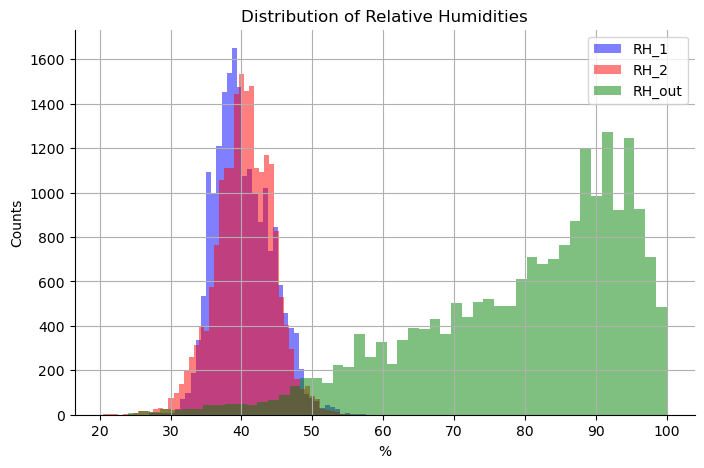

In [125]:
# Histogram plot of relative humidities

plt.figure(figsize=(8, 5))

plt.hist(df_energy['RH_1'], bins=50, label = 'RH_1', color='blue',  alpha=0.5)
plt.hist(df_energy['RH_2'], bins=50, label = 'RH_2', color='red',  alpha=0.5)
plt.hist(df_energy['RH_out'], bins=50, label = 'RH_out', color='green',  alpha=0.5)

#plt.axvline(df_energy['T1'].mean(), color="lightcoral", label="mean")
#plt.axvline(df_energy['T1'].median(), color="lightcoral", linestyle="--", label="median")

plt.title("Distribution of Relative Humidities")
plt.ylabel('Counts')
plt.xlabel("%")
sns.despine()

plt.legend()
plt.grid()
plt.show()

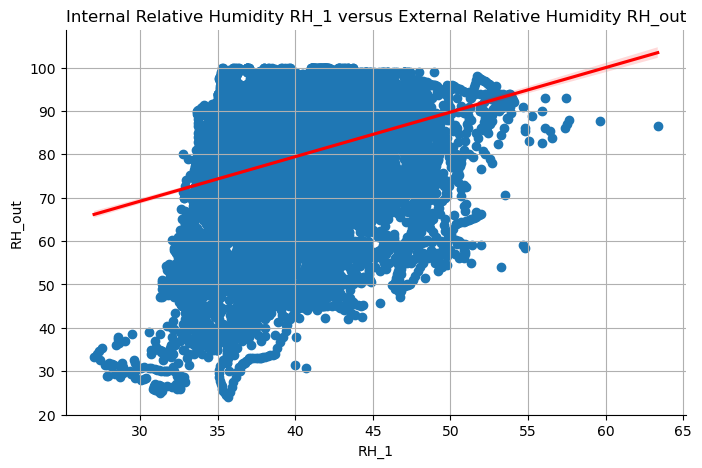

In [128]:
## Scatter plot of internal and external temperature

plt.figure(figsize=(8, 5))

plt.scatter(df_energy["RH_1"], df_energy["RH_out"])
#sns.scatterplot(data=df_energy, x="RH_1", y="RH_out")

sns.regplot(data=df_energy, x="RH_1", y="RH_out", scatter=False, color='red')


plt.title("Internal Relative Humidity RH_1 versus External Relative Humidity RH_out")
plt.ylabel('RH_out')
plt.xlabel("RH_1")
sns.despine()

#plt.legend()
plt.grid()
plt.show()

From the above, we observe that there is a linear relationship between external relative humidity and the relative humidity inside the home. This is already a suspect for multi-collinearity which we will be investigating in latter analysis 

We already know in this work that the energy comsumed by appliances is our target variable. So, we need to understand how our variables relate with eachother
to ensure independence (no multi-collinearity). This being an asumption that is shared by linear and logistic regression models can be checked before model fitting.

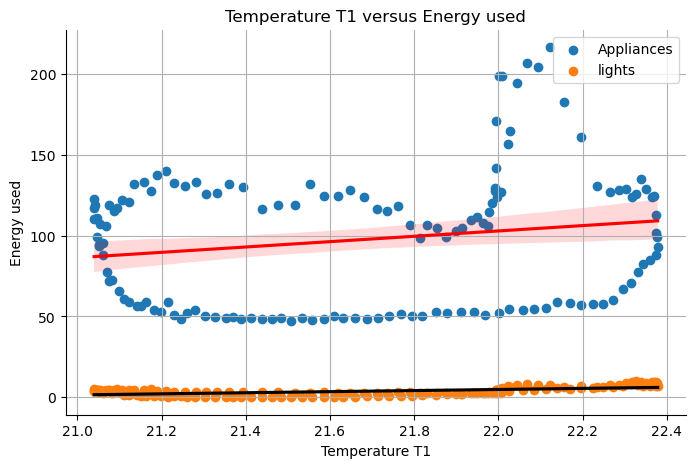

In [149]:
## Scatter plot of Temperature T1 and Appliances

plt.figure(figsize=(8, 5))

plt.scatter(df_energy.groupby("NSM")["T1"].agg(["mean"]), df_energy.groupby("NSM")["Appliances"].agg(["mean"]), label='Appliances')
plt.scatter(df_energy.groupby("NSM")["T1"].agg(["mean"]), df_energy.groupby("NSM")["lights"].agg(["mean"]), label='lights')

sns.regplot(data=df_energy.groupby("NSM").mean(), x="T1", y="Appliances", scatter=False, color='red')
sns.regplot(data=df_energy.groupby("NSM").mean(), x="T1", y="lights", scatter=False, color='black')


plt.title("Temperature T1 versus Energy used")
plt.ylabel('Energy used')
plt.xlabel("Temperature T1")
sns.despine()

plt.legend()
plt.grid()
plt.show()

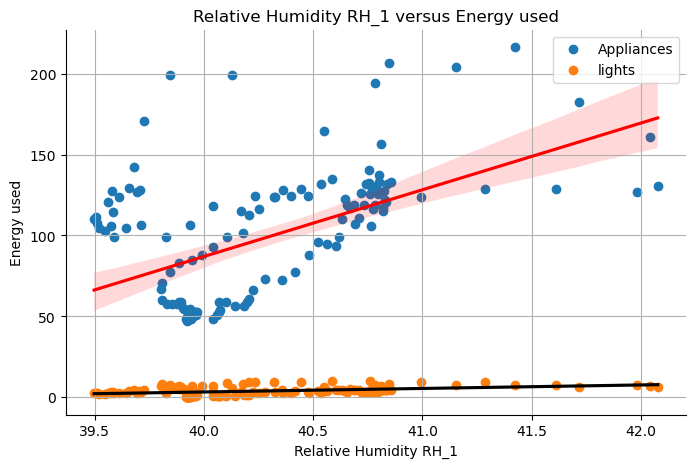

In [150]:
## Scatter plot of Temperature T1 and Appliances

plt.figure(figsize=(8, 5))

plt.scatter(df_energy.groupby("NSM")["RH_1"].agg(["mean"]), df_energy.groupby("NSM")["Appliances"].agg(["mean"]), label='Appliances')
plt.scatter(df_energy.groupby("NSM")["RH_1"].agg(["mean"]), df_energy.groupby("NSM")["lights"].agg(["mean"]), label='lights')

sns.regplot(data=df_energy.groupby("NSM").mean(), x="RH_1", y="Appliances", scatter=False, color='red')
sns.regplot(data=df_energy.groupby("NSM").mean(), x="RH_1", y="lights", scatter=False, color='black')


plt.title("Relative Humidity RH_1 versus Energy used")
plt.ylabel('Energy used')
plt.xlabel("Relative Humidity RH_1")
sns.despine()

plt.legend()
plt.grid()
plt.show()

From the above, we can observe a positive colleration from the relationships internal temperature and internal relative humidity with energy used.

#### 3.3. EDA: Visibility, WindSpeed and Tdewpoint

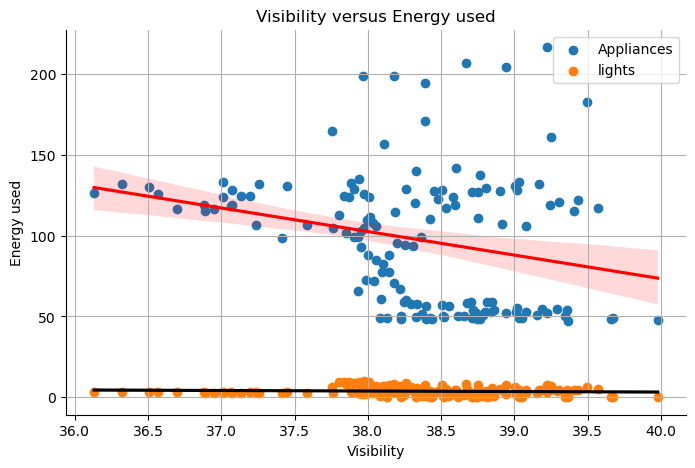

In [139]:
## Scatter plot of Visibility and Appliances

plt.figure(figsize=(8, 5))

plt.scatter(df_energy.groupby("NSM")["Visibility"].agg(["mean"]), df_energy.groupby("NSM")["Appliances"].agg(["mean"]), label='Appliances')
plt.scatter(df_energy.groupby("NSM")["Visibility"].agg(["mean"]), df_energy.groupby("NSM")["lights"].agg(["mean"]), label='lights')

sns.regplot(data=df_energy.groupby("NSM").mean(), x="Visibility", y="Appliances", scatter=False, color='red')
sns.regplot(data=df_energy.groupby("NSM").mean(), x="Visibility", y="lights", scatter=False, color='black')


plt.title("Visibility versus Energy used")
plt.ylabel('Energy used')
plt.xlabel("Visibility")
sns.despine()

plt.legend()
plt.grid()
plt.show()

The above scatter plot shows an inverse relationship between visibility and energy used by Appliances as well as energy used for lights. From this, we understand that less lights is used in the home as visibility rises.

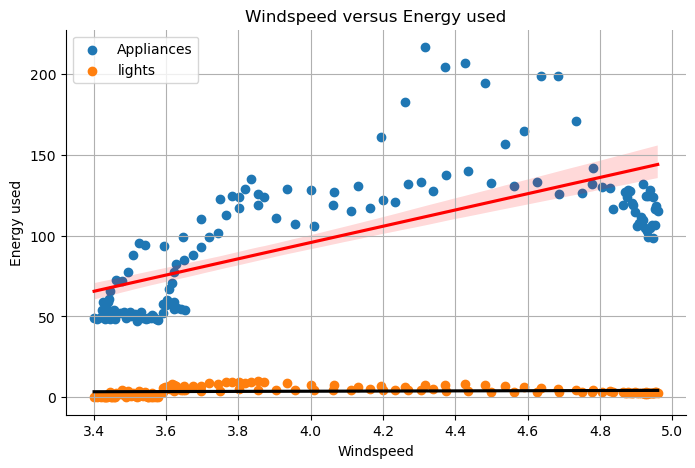

In [140]:
plt.figure(figsize=(8, 5))

plt.scatter(df_energy.groupby("NSM")["Windspeed"].agg(["mean"]), df_energy.groupby("NSM")["Appliances"].agg(["mean"]), label='Appliances')
plt.scatter(df_energy.groupby("NSM")["Windspeed"].agg(["mean"]), df_energy.groupby("NSM")["lights"].agg(["mean"]), label='lights')

sns.regplot(data=df_energy.groupby("NSM").mean(), x="Windspeed", y="Appliances", scatter=False, color='red')
sns.regplot(data=df_energy.groupby("NSM").mean(), x="Windspeed", y="lights", scatter=False, color='black')


plt.title("Windspeed versus Energy used")
plt.ylabel('Energy used')
plt.xlabel("Windspeed")
sns.despine()

plt.legend()
plt.grid()
plt.show()

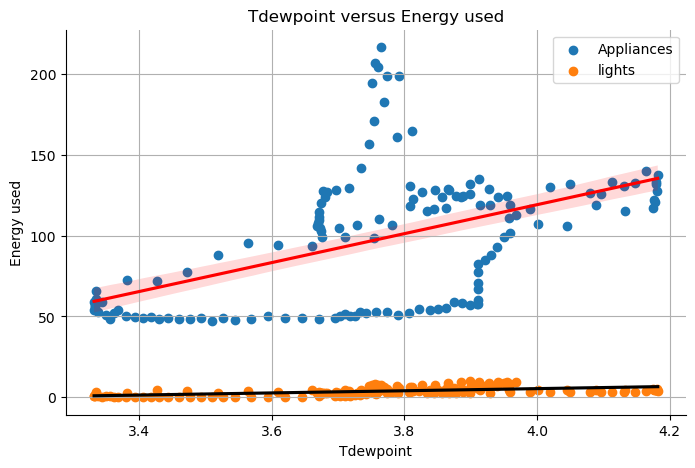

In [148]:
## Scatter plot of Tdewpoint and Appliances

plt.figure(figsize=(8, 5))

plt.scatter(df_energy.groupby("NSM")["Tdewpoint"].agg(["mean"]), df_energy.groupby("NSM")["Appliances"].agg(["mean"]), label='Appliances')
plt.scatter(df_energy.groupby("NSM")["Tdewpoint"].agg(["mean"]), df_energy.groupby("NSM")["lights"].agg(["mean"]), label='lights')

sns.regplot(data=df_energy.groupby("NSM").mean(), x="Tdewpoint", y="Appliances", scatter=False, color='red')
sns.regplot(data=df_energy.groupby("NSM").mean(), x="Tdewpoint", y="lights", scatter=False, color='black')


plt.title("Tdewpoint versus Energy used")
plt.ylabel('Energy used')
plt.xlabel("Tdewpoint")
sns.despine()

plt.legend()
plt.grid()
plt.show()

The three plots above show that the greater the wind speed and Tdewpoint, the more the energy used
by appliances in the home as well as lights while higher wind speed 
resulted to lower energy consumption.

### 4. Conclusion and Next Steps

After working on this dataset and coming to the end of EDA, we will highlight a few observations. First, the dataset provided was sufficiently clean, without incorrect data types, duplicates or missing values. However, I have created multiple columns from the date column to enable a more detailed analysis. Important observations:

- Temperature, relative humidity, air pressure, visibility and wind speed atributes as investigated all impact the quantity of energy used by appliances either positively or negatively.

- Energy used by appliances vary at different periods throughout the year


The following will be our next steps for Sprint 2:
- Train a general linear regression model to evaluate by what measure each variable contributes towards energy used.
- Investigate multi-collinearity and drop columns that do not impact performance.
- Train a linear regression model again
- Optimize the trained model to get the best performance out of it and interpret results
- Explore training using other machine learning techniques


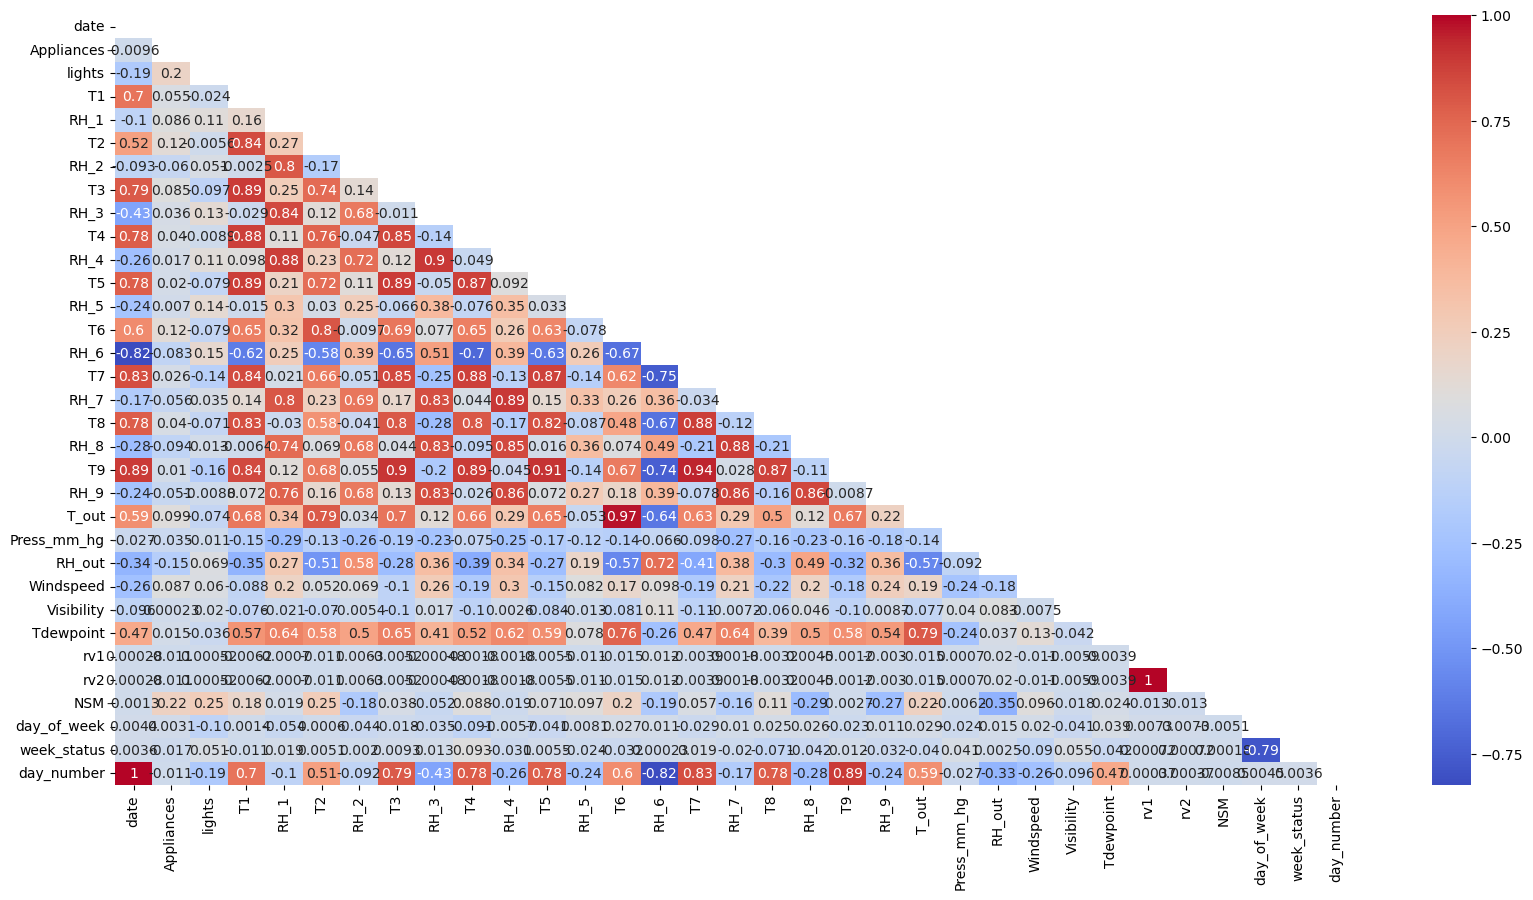

In [94]:
# find the correlation between the variables
corr = df_energy.corr()

# plot the correlation matrix using a heatmap
plt.figure(figsize=(20,10))
matrix = np.triu(df_energy.corr())
sns.heatmap(corr, annot=True, mask=matrix, cmap='coolwarm')
plt.show()

The above is a heat map showing high correlations between variables.
This is where Sprint 2 will take off from.